# Project Overview 

In this project, we are trying to create a machine learning model to predict the selling price of the car based on its information :

1. Car_Name : This column should be filled with the name of the car.
2. Year : This column should be filled with the year in which the car was bought.
3. Selling_Price : This column should be filled with the price the owner wants to sell the car at.
4. Present_Price : This is the current ex-showroom price of the car.
5. Kms_Driven : This is the distance completed by the car in km.
6. Fuel_Type : Fuel type of the car.
7. Seller_Type : Defines whether the seller is a dealer or an individual.
8. Transmission : Defines whether the car is manual or automatic.
9. Owner : Defines the number of owners the car has previously had.

Dataset : https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=car+data.csv

We are following the Crisp Data Maning methodology in this project.
Phases of CRISP-DM:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment

# I. Data Understanding

## I.0. Importing libraries

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

%matplotlib inline
pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

## I.1. Reading the dataset

In [472]:
path="D:\\ENSI\\PROJETS\\DM_Project\\"
df_cars = pd.read_csv(path+'car_data.csv')

In [473]:
df_cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [342]:
df_cars.shape

(301, 9)

In [343]:
df_cars.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [344]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null int64
Fuel_Type        301 non-null object
Seller_Type      301 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.2+ KB


##  I.2. Descriptive statistics of the dataframe

 We show here the five-number summary of the data : Min, Max , Q1, Q2, Q3 , and also the mean value

In [345]:
df_cars.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## I.3. Detection of the missing values

We check if there are NA values, such as None or numpy.NaN

In [346]:
df_cars.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

## I.4 A Simple Data Preprocessing

### I.4.1 Changing the 'Year' column to new column 'Car_Age' 

In [347]:
import datetime
date = datetime.datetime.now()
print(date.year)
print(type(date.year))

2020
<class 'int'>


In [348]:
df_cars['Year'].dtypes

dtype('int64')

In [349]:
df_cars['Car_Age'] = np.int64(date.year) - df_cars['Year']

In [350]:
df_cars.drop('Year',axis=1,inplace = True)

In [351]:
df_cars.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


## I.5. Exploratory Data Analysis (EDA)

In [352]:
df_cars.columns

Index(['Car_Name', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Car_Age'],
      dtype='object')

### II.5.1 Nominal and Categorical Columns Visualisation

Nominal columns : Car_Name, Fuel_Type,Seller_Type,Transmission

Note: We ignore the "Car_Name" column because it does not have an impact on our data.

Categorical columns: Owner (Number of owners)
 

<Figure size 720x432 with 0 Axes>

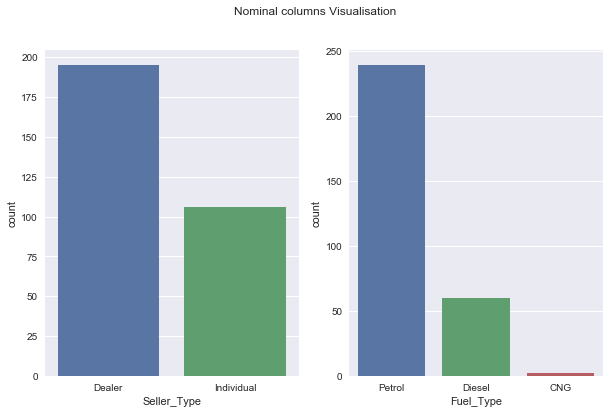

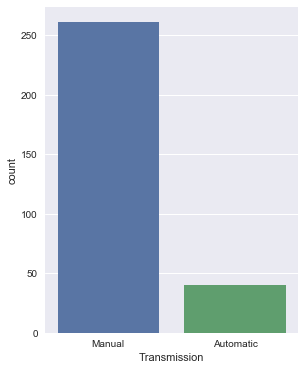

In [353]:
Nominal= ['Fuel_Type','Seller_Type','Transmission']
i=0
fig = plt.figure(figsize=[10,6])
for col in Nominal:
    if(i%2):
        fig.suptitle('Nominal columns Visualisation')
        plt.subplot(1,2,1)
        sns.countplot(x=col, data=df_cars)
        i+=1
    else :
        fig = plt.figure(figsize=[10,6])
        plt.subplot(1,2,2)
        sns.countplot(x=col, data=df_cars)
        i+=1
plt.show()

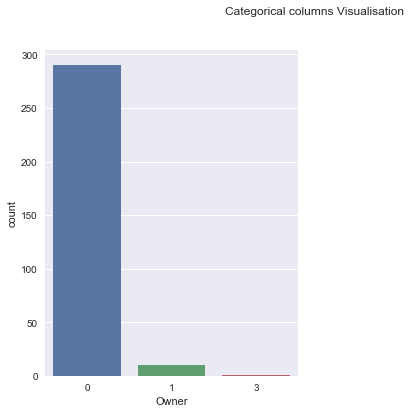

In [354]:
fig = plt.figure(figsize=[10,6])
fig.suptitle('Categorical columns Visualisation')
plt.subplot(1,2,1)
sns.countplot(x='Owner', data=df_cars)


### I.5.2 Numerical Columns Visualisation  

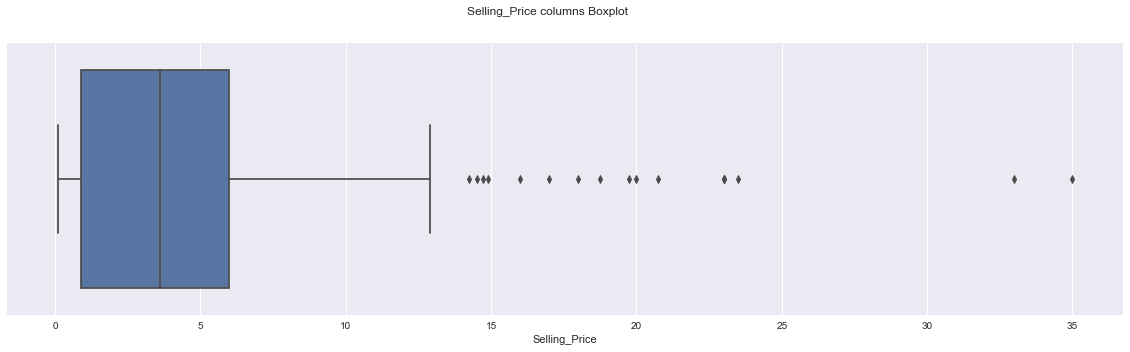

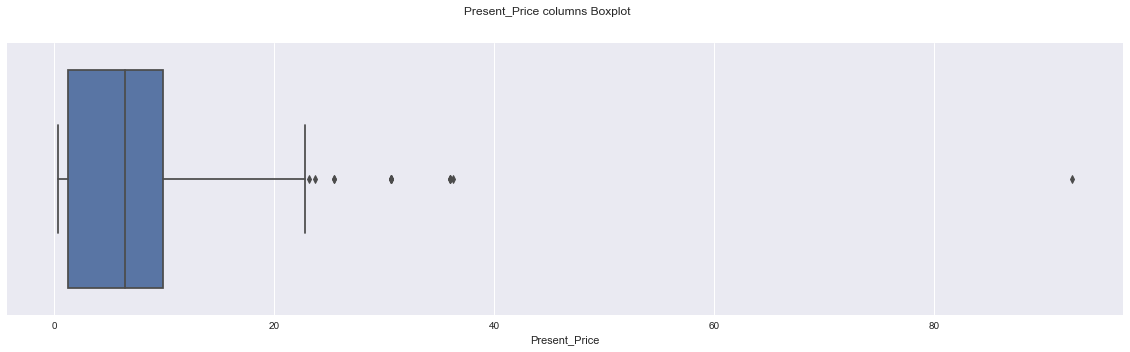

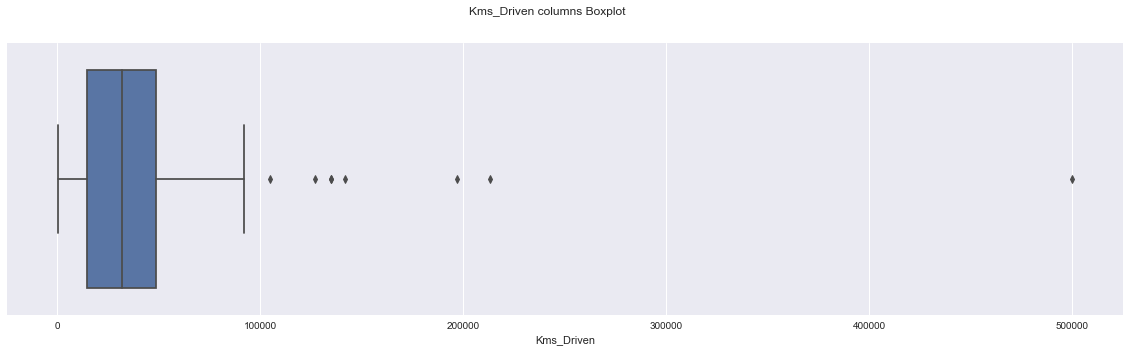

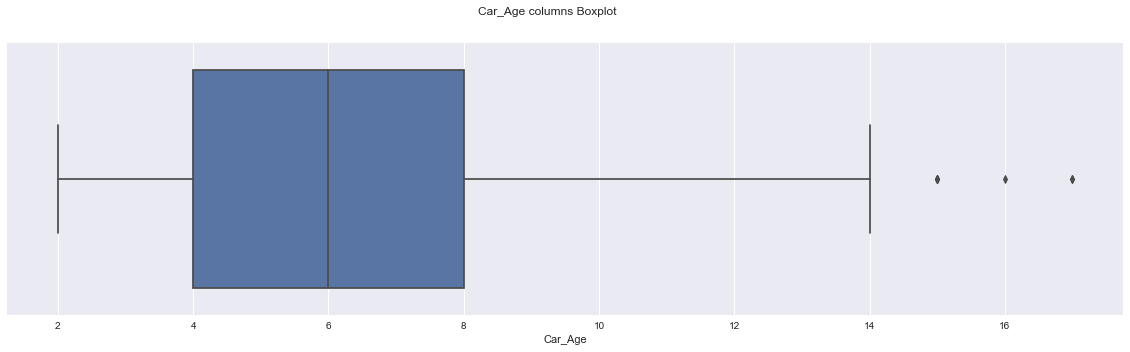

In [355]:
Numerical = ['Selling_Price','Present_Price','Kms_Driven','Car_Age']
i=0

i=0
for col in Numerical:
    fig = plt.figure(figsize=[20,5])
    fig.suptitle('{} columns Boxplot'.format(col))
    sns.boxplot(x=col, data=df_cars)
    plt.show()

### I.5.3 Plot pairwise relationships in a dataset : 

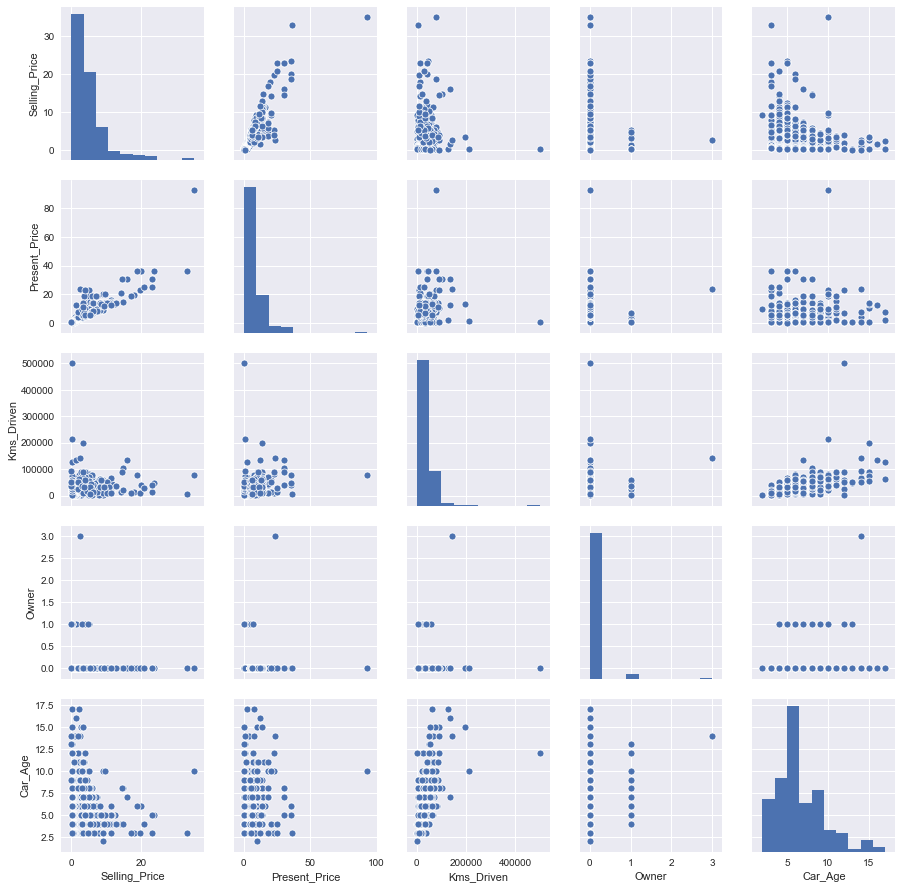

In [356]:
sns.pairplot(df_cars)

### II.6 Detection of outliers

Inter Quartile Range : IQR = Q3 - Q1

Any value below Q1 - (1.5 * IQR) or above Q3 + (1.5 * IQR) is an Outlier 

Q1 = 25 % of data ; Q3 = 75% of data



In [357]:
def get_limits(feature):
    """
    Input : a dataframe column
    Output : a tuple of two values that help us to detect outliers 
    """
    Q1 = feature.quantile(.25)
    Q3 = feature.quantile(.75)
    IQR= Q3-Q1 
    return((Q1-1.5*IQR,Q3+1.5*IQR))

#### Car_Age outliers

In [358]:
df1=df_cars
print("The maximum < outlier is : {}" .format(get_limits(df1["Car_Age"])[1]))
df1[df1["Car_Age"]>get_limits(df1["Car_Age"])[1] ]

The maximum < outlier is : 14.0


,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
37,800,0.35,2.28,127000,Petrol,Individual,Manual,0,17
39,sx4,2.25,7.98,62000,Petrol,Dealer,Manual,0,17
54,innova,2.75,10.21,90000,Petrol,Individual,Manual,0,15
77,corolla,1.50,12.35,135154,Petrol,Dealer,Automatic,0,16
84,innova,3.49,13.46,197176,Diesel,Dealer,Manual,0,15
92,innova,3.51,13.70,75000,Petrol,Dealer,Manual,0,15
189,Hero Super Splendor,0.20,0.57,55000,Petrol,Individual,Manual,0,15


#### Selling_Price outliers

In [359]:
print("The maximum < outlier is : {}" .format(get_limits(df1["Selling_Price"])[1]))
df1[df1["Selling_Price"]>get_limits(df1["Selling_Price"])[1] ]

The maximum < outlier is : 13.649999999999999


,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
50,fortuner,14.90,30.61,104707,Diesel,Dealer,Automatic,0,8
51,fortuner,23.00,30.61,40000,Diesel,Dealer,Automatic,0,5
52,innova,18.00,19.77,15000,Diesel,Dealer,Automatic,0,3
53,fortuner,16.00,30.61,135000,Diesel,Individual,Automatic,0,7
59,fortuner,19.99,35.96,41000,Diesel,Dealer,Automatic,0,6
62,fortuner,18.75,35.96,78000,Diesel,Dealer,Automatic,0,6
63,fortuner,23.50,35.96,47000,Diesel,Dealer,Automatic,0,5
64,fortuner,33.00,36.23,6000,Diesel,Dealer,Automatic,0,3
66,innova,19.75,23.15,11000,Petrol,Dealer,Automatic,0,3
69,corolla altis,14.25,20.91,12000,Petrol,Dealer,Manual,0,4


#### Present_Price outliers

In [360]:
print("The maximum < outlier is : {}" .format(get_limits(df1["Present_Price"])[1]))
df1[df1["Present_Price"]>get_limits(df1["Present_Price"])[1] ]

The maximum < outlier is : 22.950000000000003


,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
50,fortuner,14.90,30.61,104707,Diesel,Dealer,Automatic,0,8
51,fortuner,23.00,30.61,40000,Diesel,Dealer,Automatic,0,5
53,fortuner,16.00,30.61,135000,Diesel,Individual,Automatic,0,7
59,fortuner,19.99,35.96,41000,Diesel,Dealer,Automatic,0,6
62,fortuner,18.75,35.96,78000,Diesel,Dealer,Automatic,0,6
63,fortuner,23.50,35.96,47000,Diesel,Dealer,Automatic,0,5
64,fortuner,33.00,36.23,6000,Diesel,Dealer,Automatic,0,3
66,innova,19.75,23.15,11000,Petrol,Dealer,Automatic,0,3
79,fortuner,14.50,30.61,89000,Diesel,Dealer,Automatic,0,8
82,innova,23.00,25.39,15000,Diesel,Dealer,Automatic,0,3


#### Kms_Driven outliers

In [361]:
print("The maximum < outlier is : {}" .format(get_limits(df1["Kms_Driven"])[1]))
df1[df1["Kms_Driven"]>get_limits(df1["Kms_Driven"])[1] ]

The maximum < outlier is : 99417.5


,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
37,800,0.35,2.28,127000,Petrol,Individual,Manual,0,17
50,fortuner,14.90,30.61,104707,Diesel,Dealer,Automatic,0,8
53,fortuner,16.00,30.61,135000,Diesel,Individual,Automatic,0,7
77,corolla,1.50,12.35,135154,Petrol,Dealer,Automatic,0,16
84,innova,3.49,13.46,197176,Diesel,Dealer,Manual,0,15
85,camry,2.50,23.73,142000,Petrol,Individual,Automatic,3,14
179,Honda Karizma,0.31,1.05,213000,Petrol,Individual,Manual,0,10
196,Activa 3g,0.17,0.52,500000,Petrol,Individual,Automatic,0,12



### I.5.4 Correlation between features (Filter Method)

The correlation coefficient has values between -1 to 1

— A value closer to 0 implies weaker correlation (exact 0 implying no correlation)

— A value closer to 1 implies stronger positive correlation

— A value closer to -1 implies stronger negative correlation

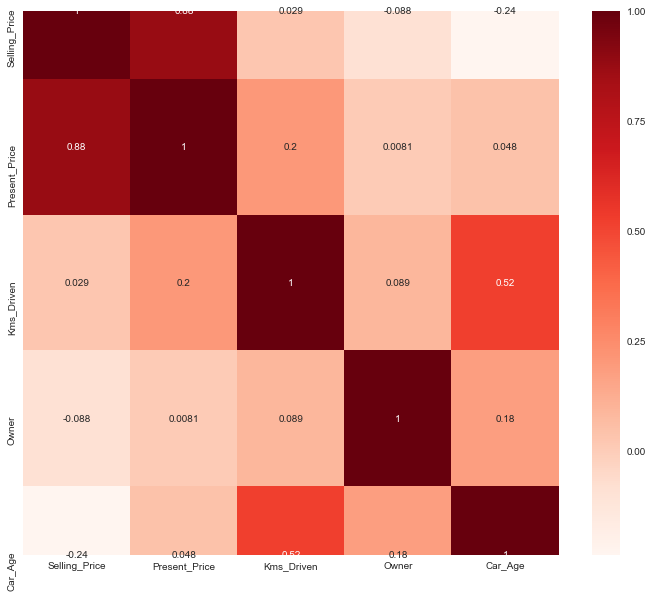

In [362]:
plt.figure(figsize=(12,10))
cor = df_cars.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
#sns.heatmap(df_cars.corr(), annot=True, cmap="RdBu")
plt.show()

In [363]:
corr=df_cars.corr()
corr

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104
Car_Age,-0.236141,0.047584,0.524342,0.182104,1.000000


In [378]:
#Correlation with output variable
cor_target = abs(cor["Selling_Price"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features


Selling_Price    1.000000
Present_Price    0.878983
Name: Selling_Price, dtype: float64

In [374]:
print(df_cars[["Present_Price","Car_Age"]].corr())

               Present_Price   Car_Age
Present_Price       1.000000  0.047584
Car_Age             0.047584  1.000000


#### Note : We don't have highly correlated features, so we keep all of them

## II. Data Preparation 

### II.1 Feature engineering : 

We drop the Car_Name column

In [379]:
df_cars.drop('Car_Name',axis=1,inplace = True)

In [380]:
df_cars.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


### II.2 One-Hot Encoding for nominal/categorical features

In [381]:
df_cars = pd.get_dummies(data = df_cars,drop_first=True)
df_cars.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [382]:
df_cars.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Car_Age',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

### II.3 Data Normalization with MinMax

In [383]:
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler = MinMaxScaler()
new_df = pd.DataFrame()
DF=df_cars

for col in ['Selling_Price','Present_Price','Kms_Driven','Owner','Car_Age','Fuel_Type_Diesel','Fuel_Type_Petrol','Seller_Type_Individual','Transmission_Manual']:
    new_col = col+'_scaled'
    u = MinMaxScaler.fit_transform(DF[[col]])  # this returns a 2D array with one column
    u = u.ravel()  # convert to a 1D array
    new_df[new_col] = u

In [384]:
df_cars=new_df
df_cars.head()

,Selling_Price_scaled,Present_Price_scaled,Kms_Driven_scaled,Owner_scaled,Car_Age_scaled,Fuel_Type_Diesel_scaled,Fuel_Type_Petrol_scaled,Seller_Type_Individual_scaled,Transmission_Manual_scaled
0,0.093123,0.057109,0.053053,0.0,0.266667,0.0,1.0,0.0,1.0
1,0.133238,0.099913,0.085085,0.0,0.333333,1.0,0.0,0.0,1.0
2,0.204871,0.103273,0.012813,0.0,0.066667,0.0,1.0,0.0,1.0
3,0.078797,0.041504,0.009409,0.0,0.466667,0.0,1.0,0.0,1.0
4,0.128940,0.070980,0.083984,0.0,0.266667,1.0,0.0,0.0,1.0


### II.4 Data cleaning : Dropping outliers  

### II.5 Splitting the dataset into train (80% of data) and test (20% of data) datasets: 

In [408]:
# features 
X = df_cars.drop('Selling_Price_scaled',axis=1)
# target variable
y = df_cars['Selling_Price_scaled']

In [409]:
X.head()

,Present_Price_scaled,Kms_Driven_scaled,Owner_scaled,Car_Age_scaled,Fuel_Type_Diesel_scaled,Fuel_Type_Petrol_scaled,Seller_Type_Individual_scaled,Transmission_Manual_scaled
0,0.057109,0.053053,0.0,0.266667,0.0,1.0,0.0,1.0
1,0.099913,0.085085,0.0,0.333333,1.0,0.0,0.0,1.0
2,0.103273,0.012813,0.0,0.066667,0.0,1.0,0.0,1.0
3,0.041504,0.009409,0.0,0.466667,0.0,1.0,0.0,1.0
4,0.070980,0.083984,0.0,0.266667,1.0,0.0,0.0,1.0


In [418]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (240, 8)
x test:  (61, 8)
y train:  (240,)
y test:  (61,)


## IV. Modeling       &     V. Evaluation


### Model Training Function

In [546]:
import pickle
cv=5 # CV value
r_2 = [] # List for r 2 score
CV = [] # list for CV scores mean

# Making folder if it dosen't exist
if not os.path.exists(path+"Car_price_models"):
    os.mkdir(path+"Car_price_models")

# Main function for models
def model(algorithm,x_train_,y_train_,x_test_,y_test_,model_name): 
    #model training
    algorithm.fit(x_train_,y_train_)
    
    predicts=algorithm.predict(x_test_)
    prediction=pd.DataFrame(predicts)
    
    # R2 score of train set
    y_pred_train = algorithm.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = algorithm.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(algorithm ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plot for prediction vs originals
    test_index=y_test_.reset_index()["Selling_Price_scaled"]
    ax=test_index.plot(label="originals",figsize=(12,6),linewidth=2,color="b")
    ax=prediction[0].plot(label = "predictions",figsize=(12,6),linewidth=2,color="g")
    plt.legend(loc='upper right')
    plt.title("ORIGINALS Values VS PREDICTIONS")
    plt.xlabel("index")
    plt.ylabel("values")
    plt.show()
    
    # Saving model to a file using pickle
    model_path = path+"Car_price_models\\"+model_name
    file = open(model_path,'wb')
    pickle.dump(algorithm,file)

### IV.1.Linear Regression

Train R2-score : 0.88
Test R2-score : 0.86
Train CV scores : [0.89912189 0.89838688 0.82980069 0.81769076 0.76113925]
Train CV mean : 0.84


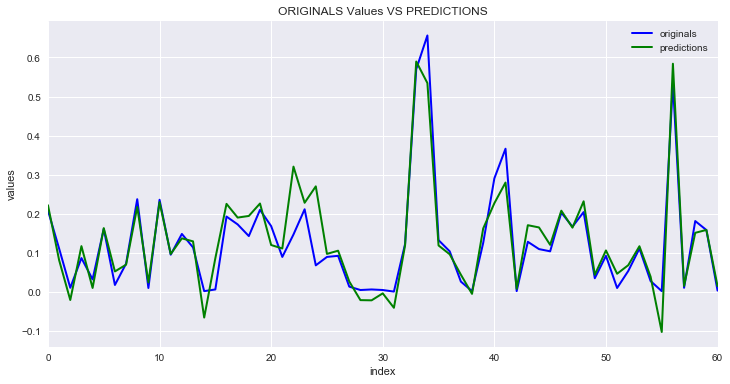

In [547]:
from sklearn.linear_model import LinearRegression
LinearRegression = LinearRegression()
model(LinearRegression,X_train,y_train,X_test,y_test,"Linear_regressor.pkl")

### Test 

In [539]:
LR_model = pickle.load(open(".\\DM_Project\\Car_price_models\\Linear_regressor.pkl","rb"))
type(LR_model)

sklearn.linear_model._base.LinearRegression

In [540]:
LR_model.predict([[2,10000,0,4,0,1,0,0]])

array([-757.68415015])

In [541]:
y_test.head()

285    0.209169
248    0.111748
150    0.011461
217    0.087393
107    0.032951
Name: Selling_Price_scaled, dtype: float64

In [542]:
y_pred = LR_model.predict(X_test)
df = pd.DataFrame({'Car Price from test dataset': y_test, 'Car price Predicted': y_pred})
df

,Car Price from test dataset,Car price Predicted
285,0.209169,0.222428
248,0.111748,0.082186
150,0.011461,-0.019780
217,0.087393,0.117861
107,0.032951,0.010979
206,0.161891,0.163912
132,0.018625,0.053203
73,0.073066,0.070433
288,0.237822,0.218015
157,0.010888,0.025177


### IV.2 Decision Tree Regressor

Train R2-score : 1.0
Test R2-score : 0.94
Train CV scores : [0.91126693 0.85480751 0.87453856 0.88017167 0.73189499]
Train CV mean : 0.85


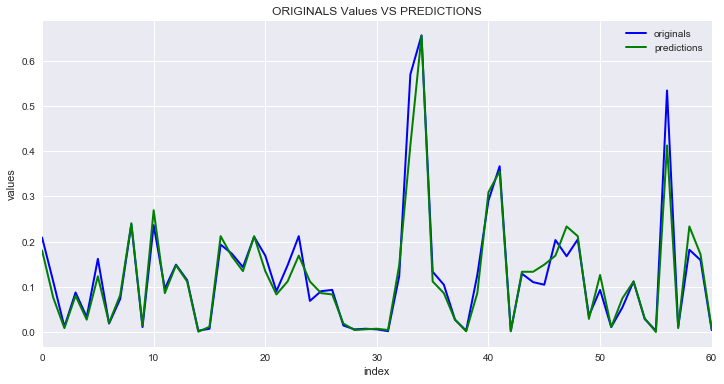

In [543]:
from sklearn.tree import DecisionTreeRegressor
DecisionTree = DecisionTreeRegressor()
model(DecisionTree,X_train,y_train,X_test,y_test,"DecisionTree.pkl")

# Houssem Nefoussi and Ghassene Tanabene : II3 GL